In [160]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
path = "D:\\Users\\Gebruiker\\Desktop\\Anita\'s rotzooi\\Tilburg University\\Brainihacks\\Hamzahacks"
os.chdir(path)
os.listdir()

['AdaptiveFirst_Adaptive.csv', 'EngagementClean', 'EngagementStudy']

In [161]:
adaptiveFirst = str(path + '\\EngagementClean\\AdaptiveFirst')
randomFirst = str(path + '\\EngagementClean\\RandomFirst')
print(len(os.listdir(adaptiveFirst)))
print(len(os.listdir(randomFirst)))

17
14


In [178]:
adaptive = []
random = []
condition = randomFirst
#condition = adaptiveFirst

for participant in range(len(os.listdir(condition))):
    filepath = str(condition + '\\' + os.listdir(condition)[participant] )
    
    for file in range(len(os.listdir(filepath))):
        
        if 'random' in os.listdir(filepath)[file]:
            path = str(filepath + '\\' + os.listdir(filepath)[file])
            random.append(pd.read_csv(path))
            
        if 'adaptive' in os.listdir(filepath)[file]: #and os.listdir(filepath)[file]!= 'P2_adaptive.csv':
            path = str(filepath + '\\' + os.listdir(filepath)[file])
            adaptive.append(pd.read_csv(path))

print(len(adaptive))
print(len(random))

14
14


Text(0, 0.5, 'Engagement')

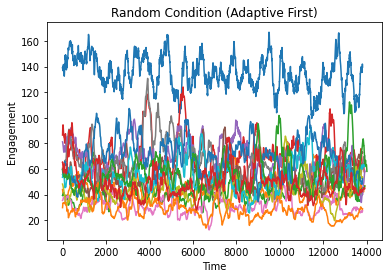

In [186]:
averages = []
for i in range(len(adaptive)):
    averages.append(adaptive[i]['secondsaverage'])
    plt.plot(adaptive[i]['secondsaverage'])

plt.title('Adaptive Condition (Random First)')
plt.xlabel('Time')
plt.ylabel('Engagement')

C:\Users\GEBRUI~1\AppData\Local\Temp/ipykernel_9384/952167228.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  averages = np.array(averages)


Text(0, 0.5, 'Engagement')

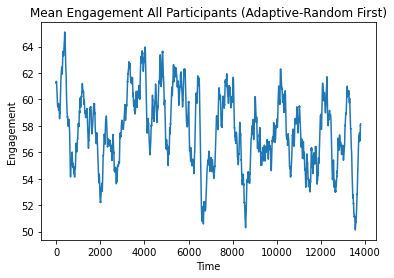

In [187]:
averages = np.array(averages)
mean = np.mean(averages)
plt.plot(mean)
plt.title('Mean Engagement All Participants (Adaptive-Random First)')
plt.xlabel('Time')
plt.ylabel('Engagement')

In [188]:
#big dataframe

columns = []
colnames = []
for i in range(len(adaptive)):
    columns.append(np.array(random[i]['secondsaverage'], dtype = np.float32))
    colnames.append(str('P'+ str((i+1))))

data = pd.DataFrame(columns)

data = data.T
data = data[:14500]


In [189]:
from sklearn.preprocessing import MinMaxScaler
colnames = os.listdir(condition)
#colnames.remove('P2')
scaler = MinMaxScaler()
scaler.fit(data)
normalized = pd.DataFrame(scaler.transform(data))
normalized.columns = colnames

In [190]:
normalized

,P10,P11,P14,P15,P18,P22,P23,P26,P27,P3,P30,P31,P6,P7
0,0.377609,0.336998,0.784049,0.533973,0.512391,0.489091,0.262863,0.391632,0.239510,0.443185,0.371325,0.327510,0.180529,0.573960
1,0.369909,0.331655,0.781959,0.535656,0.513387,0.491230,0.262158,0.392191,0.240932,0.438330,0.373451,0.326789,0.182881,0.575121
2,0.362985,0.326415,0.779868,0.537091,0.514090,0.493736,0.261217,0.392191,0.242750,0.435416,0.375332,0.326148,0.185441,0.575793
3,0.356787,0.321073,0.777673,0.538130,0.514383,0.496119,0.260277,0.392261,0.244883,0.434121,0.377581,0.325747,0.188002,0.576221
4,0.351315,0.315730,0.775792,0.538873,0.513973,0.498564,0.259195,0.392261,0.247254,0.433878,0.379913,0.325347,0.190631,0.576404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14495,0.616435,0.665982,0.840807,0.487603,0.458140,0.474424,0.209670,0.266327,0.336942,0.285610,0.506645,0.148169,0.410047,0.452252
14496,0.615951,0.658071,0.837567,0.486465,0.460250,0.475035,0.209905,0.265000,0.339866,0.286420,0.505091,0.148970,0.410047,0.458728
14497,0.614595,0.649954,0.833281,0.484684,0.462769,0.475463,0.210234,0.263393,0.342789,0.286662,0.503619,0.150172,0.410185,0.467037
14498,0.612803,0.642043,0.826278,0.482605,0.466284,0.475830,0.210516,0.261926,0.345713,0.286581,0.501983,0.151374,0.410601,0.475652


In [191]:
normalized.to_csv('RandomFirst_Adaptive.csv')

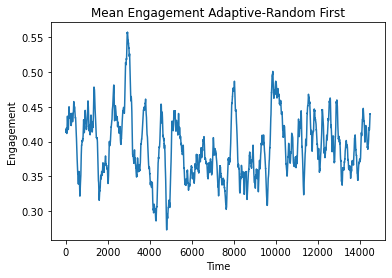

In [192]:
plt.plot(np.mean(normalized, axis = 1))
plt.title('Mean Engagement Adaptive-Random First')
plt.xlabel('Time')
plt.ylabel('Engagement')
plt.savefig('Random First_Random', dpi = 300)